In [8]:
library('tidyverse')
library('dplyr')
library('scales')

In [9]:
movie = read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2022/2022-11-01/horror_movies.csv', col_types = cols())

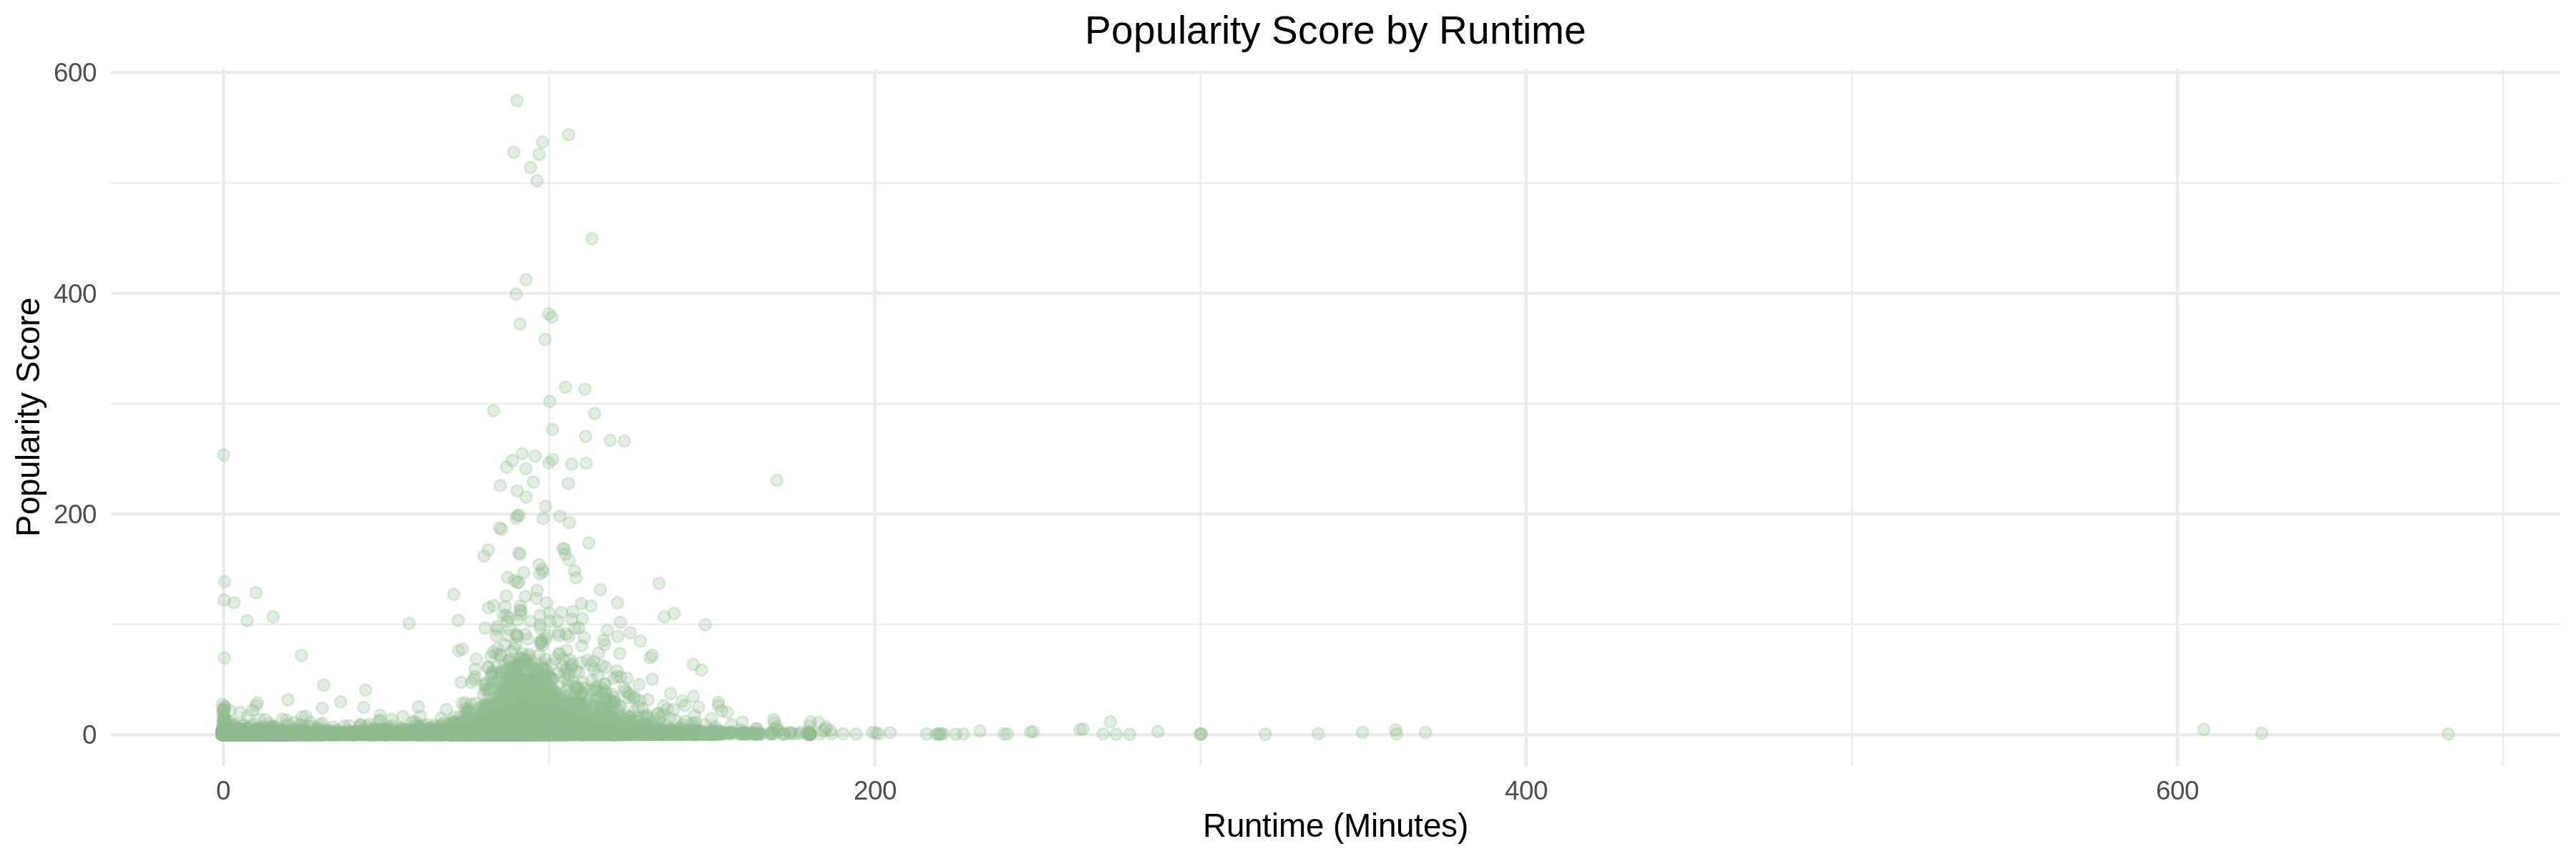

In [10]:
movie1 = movie %>%
    filter(status == "Released" & popularity < 600)

p = ggplot(movie1, aes(x = runtime, y = popularity)) + 
    geom_point(position = position_jitter(height = .25), alpha = .25,na.rm = TRUE, color = 'darkseagreen') +
    labs(y= 'Popularity Score', x='Runtime (Minutes)', title = 'Popularity Score by Runtime') + 
    theme_minimal() +
    theme(plot.title = element_text(hjust = 0.5))
p

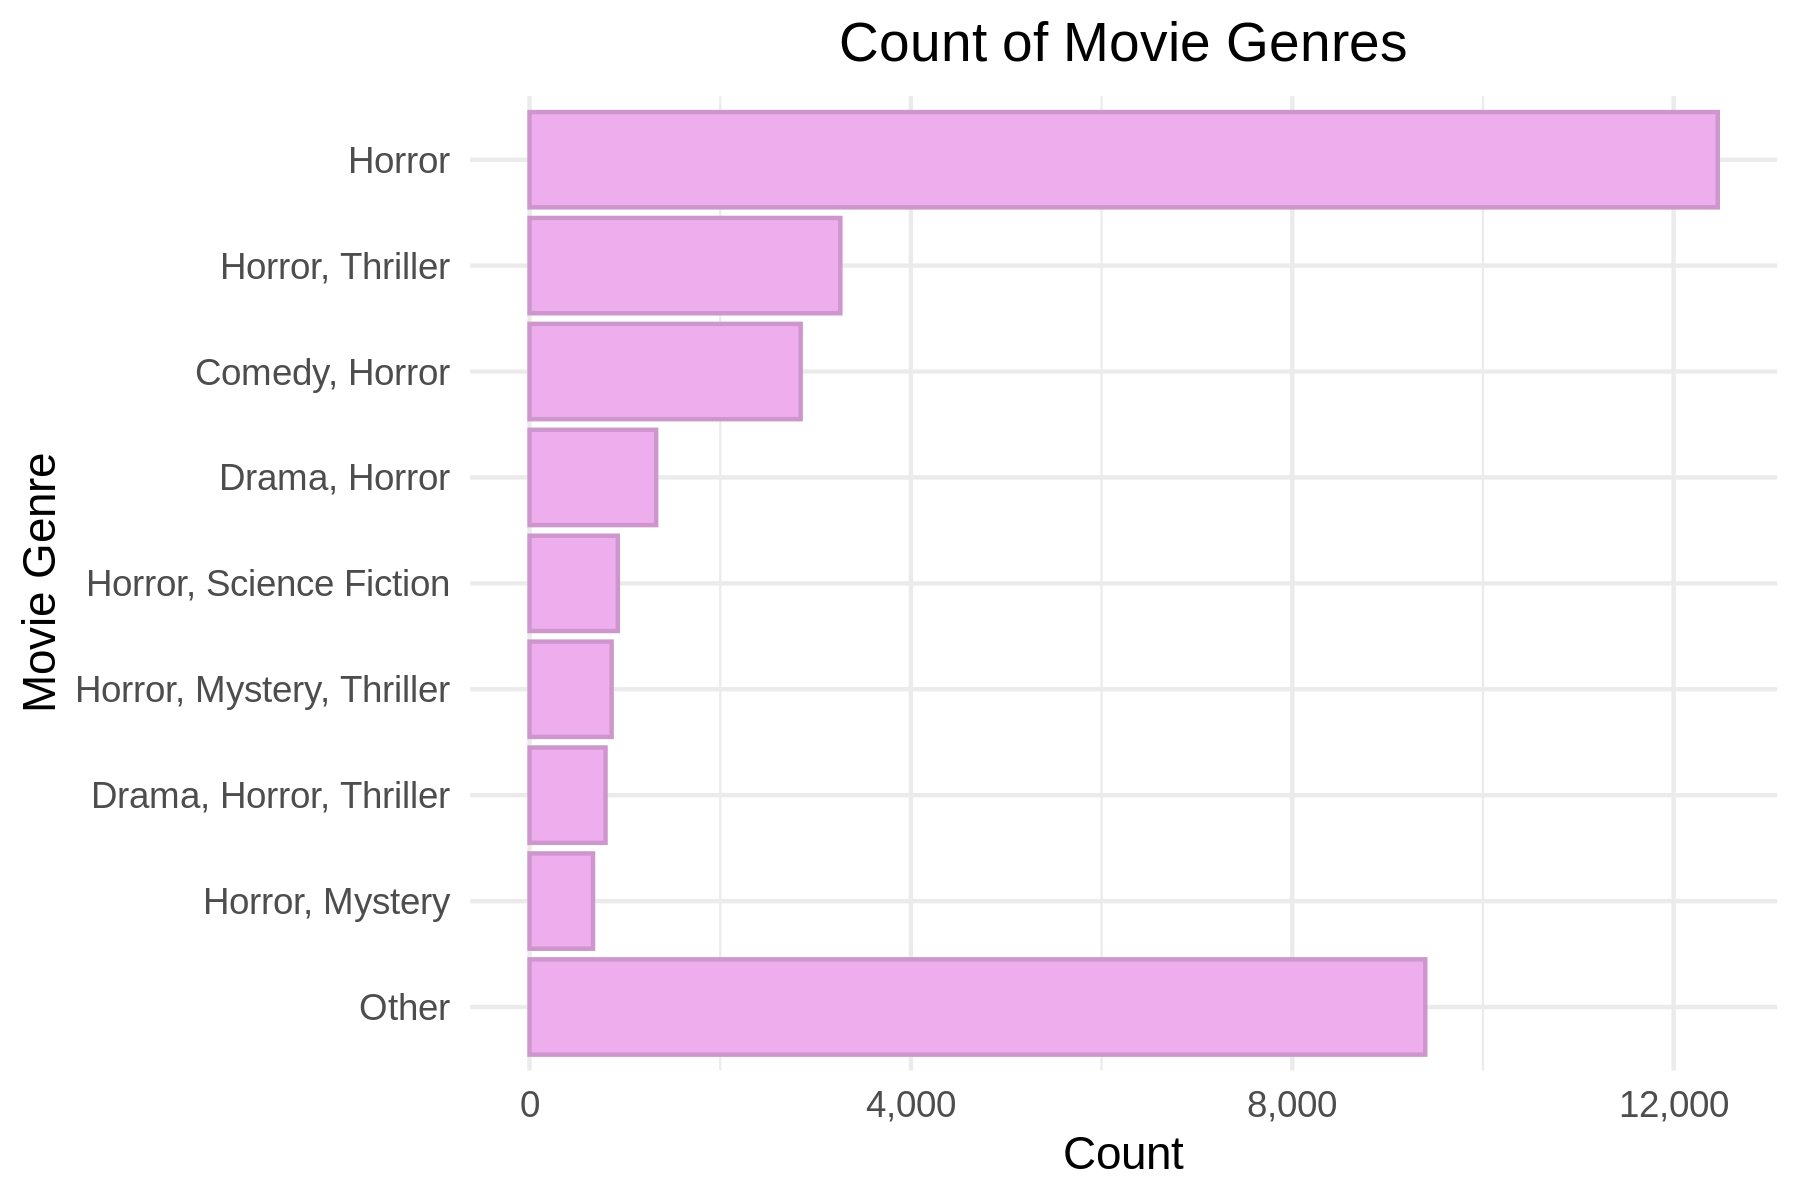

In [357]:
options(repr.plot.width=6, repr.plot.height=4)

movie2 = movie|>
    mutate(genre_names = fct_infreq(genre_names) |> fct_rev()) |>
    mutate(genre_names = fct_lump(genre_names, n =8) |> fct_relevel('Other'))

p = ggplot(movie2, aes(x = genre_names)) + 
    geom_bar(na.rm = TRUE, color = 'plum3', fill = 'plum2') + 
    coord_flip() +
    theme_minimal() + 
    labs(y = 'Count', x = 'Movie Genre', title = 'Count of Movie Genres') +
    scale_y_continuous(labels = comma_format()) +
    theme(plot.title = element_text(hjust = 0.5))
p

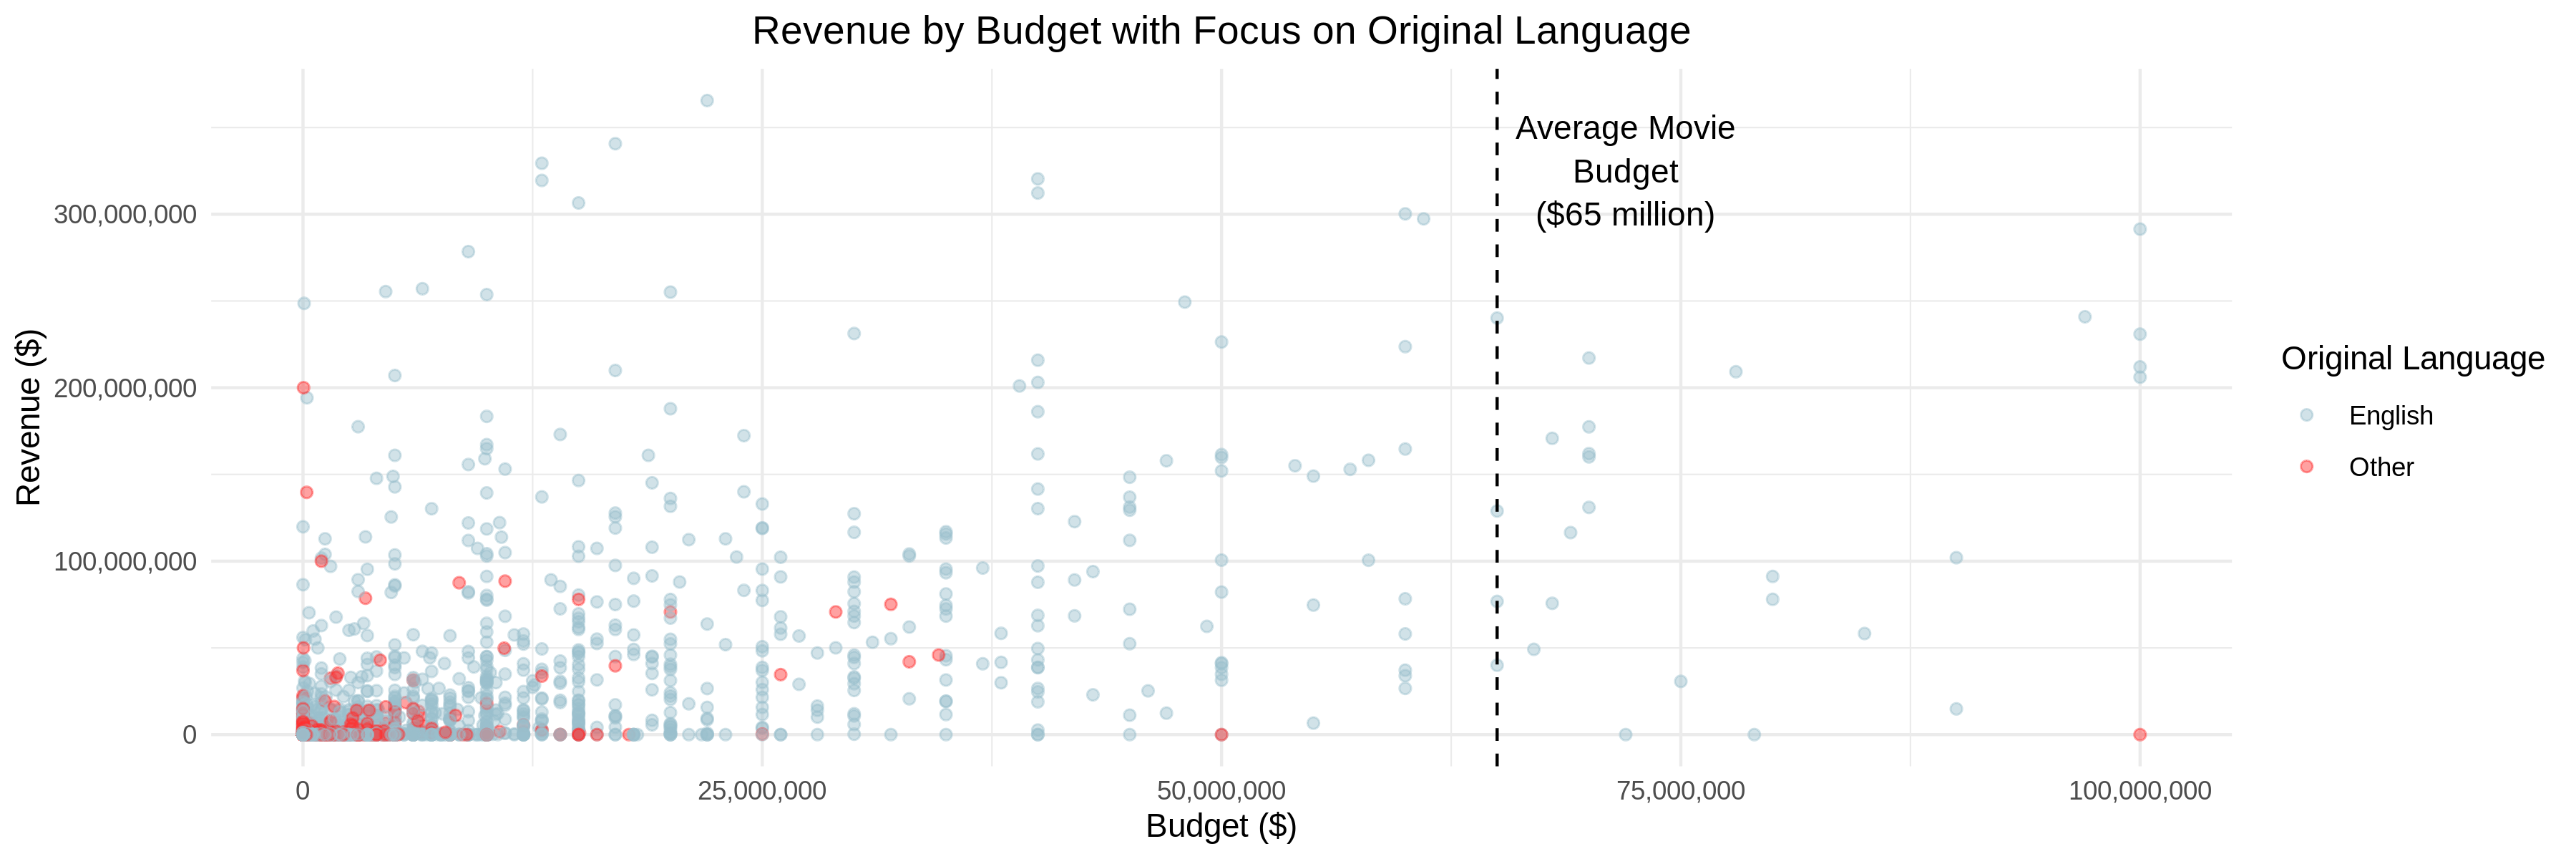

In [7]:
options(repr.plot.width=12, repr.plot.height=4)
movie3 = movie |>
    filter(budget <= 125000000) |>
    filter(revenue <=400000000) |>
    mutate(lang = ifelse(original_language == "en", 'English', 'Other'), na.rm= TRUE)

p = ggplot(movie3, aes(x = budget, y = revenue, color = lang, na.rm = TRUE)) + 
    geom_point(position = position_jitter(height = .25, width = .25), alpha = .45, na.rm = TRUE) + 
    theme_minimal() + 
    labs(x = "Budget ($)", y = "Revenue ($)", color = 'Original Language', title = 'Revenue by Budget with Focus on Original Language') +
    scale_x_continuous(labels = comma_format()) + 
    scale_y_continuous(labels = comma_format()) + 
    scale_color_manual(values=c('lightblue3', 'firebrick1')) + 
    geom_vline(xintercept = 65000000, linetype = 'dashed') +
    annotate(geom ="text", x = 72000000, y = 350000000, label = "Average Movie") +
    annotate(geom ="text", x = 72000000, y = 325000000, label = "Budget") + 
    annotate(geom ="text", x = 72000000, y = 300000000, label = "($65 million)") +
    theme(plot.title = element_text(hjust = 0.5))
p

![](https://i.ytimg.com/vi/kDJJOHIeiiU/maxresdefault.jpg)